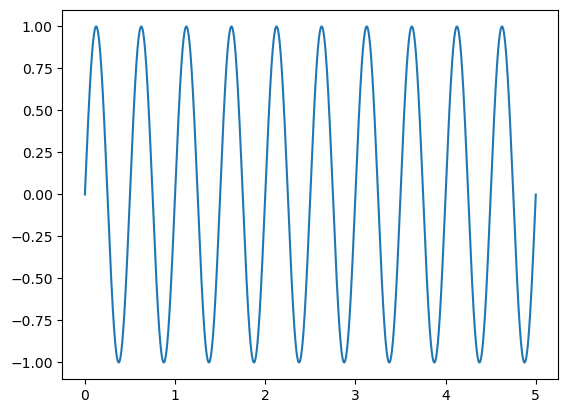

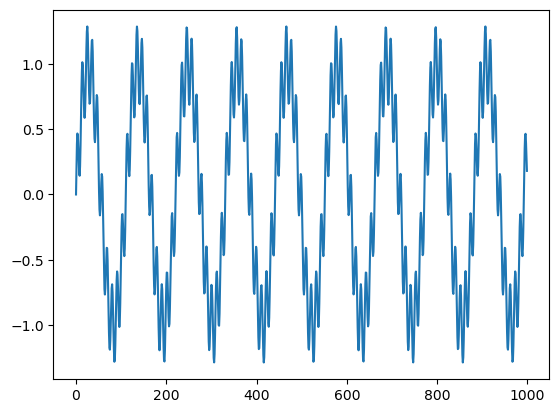

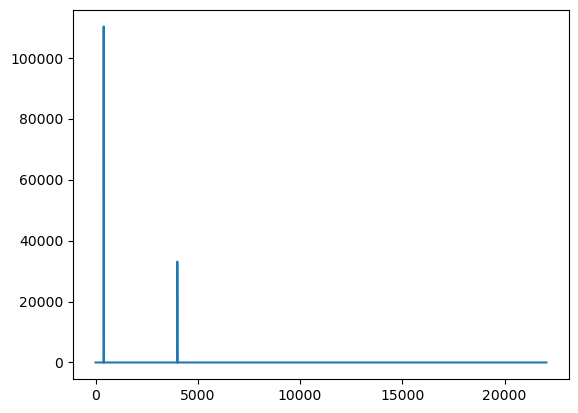

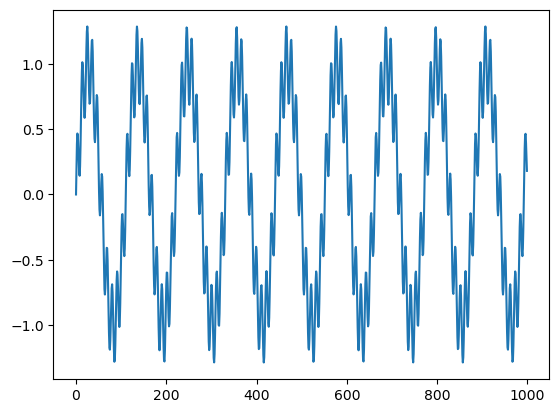

In [5]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.fft import rfft, rfftfreq, irfft

SAMPLE_RATE = 44100  # Hertz
DURATION = 5  # Seconds
N = SAMPLE_RATE * DURATION

def generate_sine_wave(freq, sample_rate, duration):
    x = np.linspace(0, duration, sample_rate * duration, endpoint=False)
    frequencies = x * freq
    # 2pi because np.sin takes radians
    y = np.sin((2 * np.pi) * frequencies)
    return x, y

# Generate a 2 hertz sine wave that lasts for 5 seconds
x, y = generate_sine_wave(2, SAMPLE_RATE, DURATION)
plt.plot(x, y)
plt.show()

_, nice_tone = generate_sine_wave(400, SAMPLE_RATE, DURATION)
_, noise_tone = generate_sine_wave(4000, SAMPLE_RATE, DURATION)
noise_tone = noise_tone * 0.3

mixed_tone = nice_tone + noise_tone
plt.plot(mixed_tone[:1000])
plt.show()


# Note the extra 'r' at the front
yf = rfft(mixed_tone)
xf = rfftfreq(N, 1 / SAMPLE_RATE)

plt.plot(xf, np.abs(yf))
plt.show()

new_sig1 = irfft(yf)

plt.plot(new_sig1[:1000])
plt.show()
